<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%EA%B3%B5%EC%9B%90_%EC%82%B0%EC%B1%85(Lv_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 공원 산책
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/172928)

## 문제 설명

지나다니는 길을 'O', 장애물을 'X'로 나타낸 직사각형 격자 모양의 공원에서 로봇 강아지가 산책을 하려합니다. 산책은 로봇 강아지에 미리 입력된 명령에 따라 진행하며, 명령은 다음과 같은 형식으로 주어집니다.

- ["방향 거리", "방향 거리" … ]

예를 들어 "E 5"는 로봇 강아지가 현재 위치에서 동쪽으로 5칸 이동했다는 의미입니다. 로봇 강아지는 명령을 수행하기 전에 다음 두 가지를 먼저 확인합니다.

- 주어진 방향으로 이동할 때 공원을 벗어나는지 확인합니다.
- 주어진 방향으로 이동 중 장애물을 만나는지 확인합니다.

위 두 가지중 어느 하나라도 해당된다면, 로봇 강아지는 해당 명령을 무시하고 다음 명령을 수행합니다.
공원의 가로 길이가 W, 세로 길이가 H라고 할 때, 공원의 좌측 상단의 좌표는 (0, 0), 우측 하단의 좌표는 (H - 1, W - 1) 입니다.

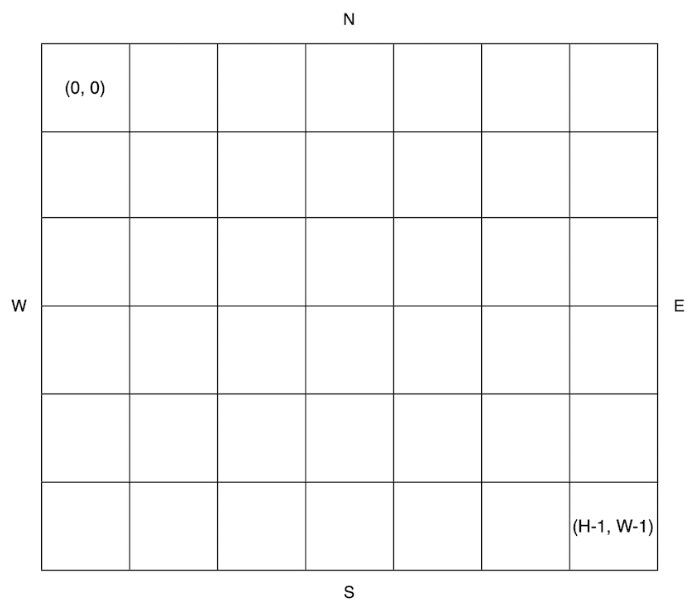

공원을 나타내는 문자열 배열 park, 로봇 강아지가 수행할 명령이 담긴 문자열 배열 routes가 매개변수로 주어질 때, 로봇 강아지가 모든 명령을 수행 후 놓인 위치를 [세로 방향 좌표, 가로 방향 좌표] 순으로 배열에 담아 return 하도록 solution 함수를 완성해주세요.

## 제한사항

- 3 ≤ park의 길이 ≤ 50
    - 3 ≤ park[i]의 길이 ≤ 50
        - park[i]는 다음 문자들로 이루어져 있으며 시작지점은 하나만 주어집니다.
            - S : 시작 지점
            - O : 이동 가능한 통로
            - X : 장애물
        - park는 직사각형 모양입니다.
- 1 ≤ routes의 길이 ≤ 50
    - routes의 각 원소는 로봇 강아지가 수행할 명령어를 나타냅니다.
    - 로봇 강아지는 routes의 첫 번째 원소부터 순서대로 명령을 수행합니다.
    - routes의 원소는 "op n"과 같은 구조로 이루어져 있으며, op는 이동할 방향, n은 이동할 칸의 수를 의미합니다.
        - op는 다음 네 가지중 하나로 이루어져 있습니다.
            - N : 북쪽으로 주어진 칸만큼 이동합니다.
            - S : 남쪽으로 주어진 칸만큼 이동합니다.
            - W : 서쪽으로 주어진 칸만큼 이동합니다.
            - E : 동쪽으로 주어진 칸만큼 이동합니다.
        - 1 ≤ n ≤ 9

## 입출력 예

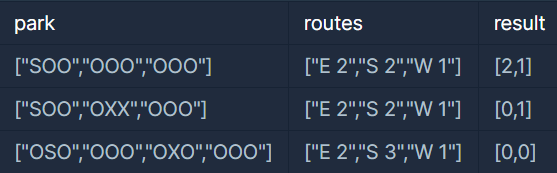

## 입출력 예 설명

### 입출력 예 #1

입력된 명령대로 동쪽으로 2칸, 남쪽으로 2칸, 서쪽으로 1칸 이동하면 [0,0] -> [0,2] -> [2,2] -> [2,1]이 됩니다.

### 입출력 예 #2

입력된 명령대로라면 동쪽으로 2칸, 남쪽으로 2칸, 서쪽으로 1칸 이동해야하지만 남쪽으로 2칸 이동할 때 장애물이 있는 칸을 지나기 때문에 해당 명령을 제외한 명령들만 따릅니다. 결과적으로는 [0,0] -> [0,2] -> [0,1]이 됩니다.

### 입출력 예 #3

처음 입력된 명령은 공원을 나가게 되고 두 번째로 입력된 명령 또한 장애물을 지나가게 되므로 두 입력은 제외한 세 번째 명령만 따르므로 결과는 다음과 같습니다. [0,1] -> [0,0]

## 첫 번째 방법

1. 입력받은 park를 순회하여 "S"의 위치를 st_x, st_y에 저장.
2. routes의 원소를 route로 순회하는 반복문으로 st_x, st_y를 각각 tmp_x, tmp_y에 저장.
3. route[2]만큼 반복문을 돌려 가려는 방향에 "X"가 있거나 범위를 벗어나면 tmp에 st를 저장해 이동하기 전 원래 위치로 돌려놓음.
4. [st_x, st_y]를 return.

결과 : 성공

In [64]:
def solution(park, routes):

    flag = True
    for i in range(len(park)):
        for j in range(len(park[0])):
            if park[i][j] == "S":
                st_x, st_y = i, j
                flag = False
                break
        if flag == False:
            break

    for route in routes:
        tmp_x, tmp_y = st_x, st_y
        if route[0] == "E":
            for _ in range(int(route[2])):
                if tmp_y + 1 >= len(park[0]) or park[st_x][tmp_y + 1] == "X":
                    tmp_y = st_y
                    break
                else:
                    tmp_y += 1
            st_y = tmp_y

        elif route[0] == "W":
            for _ in range(int(route[2])):
                if tmp_y - 1 < 0 or park[st_x][tmp_y - 1] == "X":
                    tmp_y = st_y
                    break
                else:
                    tmp_y -= 1
            st_y = tmp_y

        elif route[0] == "S":
            for _ in range(int(route[2])):
                if tmp_x + 1 >= len(park) or park[tmp_x + 1][st_y] == "X":
                    tmp_x = st_x
                    break
                else:
                    tmp_x += 1
            st_x = tmp_x

        elif route[0] == "N":
            for _ in range(int(route[2])):
                if tmp_x - 1 < 0 or park[tmp_x - 1][st_y] == "X":
                    tmp_x = st_x
                    break
                else:
                    tmp_x -= 1
            st_x = tmp_x

    return [st_x, st_y]

solution(["OSO","OOO","OXO","OOO"], ["E 2","S 3","W 1"])

[0, 0]